# An Analysis of Employee Attrition in a Company
## Business Understanding - IBM HR Analytics Dataset


In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive


### Kegunaan kode ini yaitu untuk mengimport data drive ke google colab

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# **Business Understanding**

Business Understanding adalah tahap awal dalam memproses analisis data, yang bertujuan untuk memahami permasalahan bisnis, kondisi dataset, dan menentukan arah analisis yang akan dilakukan.

di tahap Business Understanding, fokus utama adalah memahami konteks masalah employee attrition (PenguranganKaryawan) dalam perusahaan serta merumuskan tujuan analisis berdasarkan dataset yang dipilih.


# **1. Business Objective**

Dataset ini berisi informasi tentang karyawan dalam sebuah perusahaan, termasuk data demografis, jabatan, pendapatan, pengalaman kerja, serta status Attrition (keluar atau tetap bekerja).

Masalah utama yang ingin diketahui dari dataset ini ialah fenomena employee attrition, yaitu kondisi dimana ketika karyawan memilih untuk keluar dari sebuah perusahaan.

Attrition merupakan permasalahan penting bagi perusahaan. mengapa sangat penting karena dapat meningkatkan biaya anggaran rekrutmen, pelatihan, serta menurunkan produktivitas dan stabilitas perusahaan.

Tujuan bisnis dari analisis ini adalah memahami faktor-faktor yang berkaitan dengan attrition supaya perusahaan dapat mengurangi tingkat turnover dan meningkatkan retensi karyawan.


# **2. Assess Situation**

Dataset IBM HR Analytics terdiri dari 1470 baris dan 35 kolom, dengan kombinasi data numerik dan kategorikal.

Beberapa kondisi dataset:
- Target variabel adalah Attrition (Yes/No)
- Ada berbagai fitur seperti: Age, JobRole, MonthlyIncome, OverTime, YearsAtCompany, dan lainnya
- Dataset tidak memiliki missing value berdasarkan deskripsi sumber Kaggle

Tantangan yang mungkin dihadapi:
1. Banyaknya fitur yang dapat membuat analisis menjadi kompleks
2. Data kategorikal perlu dipahami sebelum dianalisis lebih lanjut
3. Distribusi Attrition tidak seimbang (lebih banyak yang tidak resign dibanding yang resign)
4. Perlu memahami hubungan antar variabel untuk mendapatkan insight yang relevan


#  **3. Analytic Goals**

Untuk mengatasi permasalahan attrition, analisis akan difokuskan pada:

1. Mengidentifikasi variabel yang berpotensi mempengaruhi attrition
2. Menganalisis hubungan antara faktor demografis dan attrition
3. Menganalisis pengaruh faktor pekerjaan seperti OverTime, JobRole, dan MonthlyIncome terhadap attrition
4. Menemukan pola umum karakteristik karyawan yang resign

Hasil analisis diharapkan dapat memberikan insight yang bisa digunakan untuk strategi retensi karyawan.


# **4. Project Plan**

Rencana yang dilakukan dalam proyek ini adalah:

1. Memahami struktur dataset dan tipe data
2. Melakukan eksplorasi awal untuk memahami distribusi data
3. Melakukan analisis hubungan antara fitur dengan Attrition
4. Menyusun insight berdasarkan hasil eksplorasi data
5. Menyimpulkan temuan dan memberikan rekomendasi berbasis data


.

.

# *Checkpoint 2*

# LIbrary

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Understanding

## Stuktur Data

In [ ]:
df.shape

(1470, 35)

### **Penjelasan**

Dataset menunjukkan ada 1470 baris dan 35 kolom, yang berarti ada 1470 observasi karyawan dengan 35 variabel yang menjelaskan karakteristik masing-masing individu. Jumlah ini sudah cukup representatif untuk analisis eksploratif dan memungkinkan identifikasi pola yang relevan terkait attrition

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### **Penjelasan**

Dataset mencakup berbagai variabel yang merepresentasikan aspek demografis seperti usia dan jenis kelamin, aspek pekerjaan seperti JobRole dan OverTime, serta aspek finansial seperti MonthlyIncome. Selain itu, terdapat variabel target yaitu Attrition yang menjadi fokus utama analisis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### **Penjelasan**

Dataset ini memiliki kombinasi tipe data numerik dan kategorikal yang sesuai dengan konteks variabelnya. Seluruh kolom memiliki jumlah entri yang sama, sehingga tidak terdapat missing values. Hal ini menunjukkan bahwa dataset berada dalam kondisi lengkap dan siap untuk tahap eksplorasi lebih lanjut tanpa perlu pembersihan data awal

##

## Statistik Deskriptif

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### **Penjelasan**

Berdasarkan statistik deskriptif, rata-rata usia karyawan berada di 36 tahun, yang berarti menunjukkan mayoritas tenaga kerja berada pada usia produktif. MonthlyIncome memiliki rentang nilai yang cukup besar antara nilai minimum dan maksimum, yang mengindikasikan adanya perbedaan tingkat jabatan atau level pekerjaan

In [ ]:
df.describe(include="object")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


### **Penjelasan**

Dari variabel ini,rata-rata mayoritas karyawan tidak mengalami attrition (Pengurangan) dibandingkan yang keluar.
Dan Departemen dengan jumlah karyawan terbesar adalah Research & Development, yang menunjukkan fokus utama perusahaan berada pada fungsi tersebut

## Tipe Data

In [ ]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


### **Penjelasan**

Seluruh kolom memiliki tipe data yang sesuai dengan konteksnya, sehingga tidak perlu dikonversi tipe data tambahan pada tahap ini

## Konsistensi Value

In [ ]:
df["Attrition"].unique()

array(['Yes', 'No'], dtype=object)

### **Penjelasan**

Di Kolom Attrition ini hanya memiliki dua nilai yaitu Yes dan No tanpa variasi penulisan. Hal ini menunjukkan konsistensi dalam pencatatan data dan memudahkan proses analisis karena tidak diperlukan normalisasi kategori

## Missing Value

In [ ]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


### **Penjelasan**

Tidak ditemukan adanya missing values pada seluruh kolom dataset ini. Kondisi ini berarti menunjukkan bahwa dataset sudah dipersiapkan dengan baik dan tidak memerlukan proses imputasi atau penghapusan data akibat nilai kosong

## Duplicated

In [ ]:
df.duplicated().sum()

np.int64(0)

### *Penjelasan*

Di kolom ini tidak terdapat data duplikat dalam dataset.
Setiap baris merepresentasikan satu karyawan yang unik, sehingga tidak ada risiko akibat pengulangan data dalam analisis

## Outlier

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Age,0.000000
DailyRate,0.000000
DistanceFromHome,0.000000
Education,0.000000
EmployeeCount,0.000000
EmployeeNumber,0.000000
EnvironmentSatisfaction,0.000000
HourlyRate,0.000000
JobInvolvement,0.000000
JobLevel,0.000000


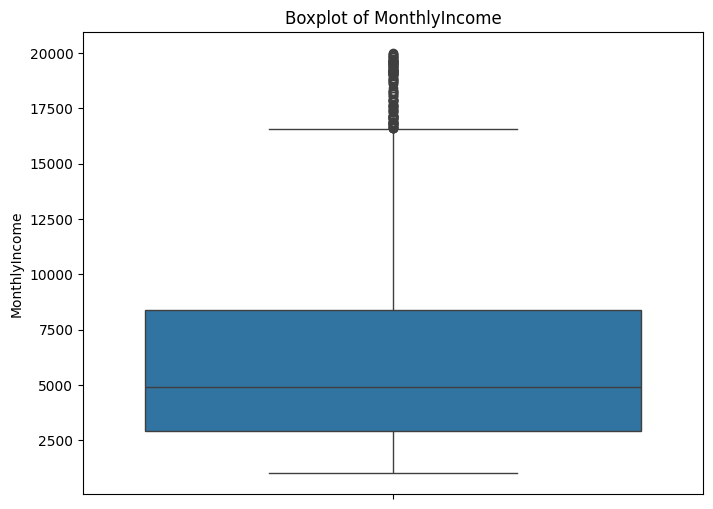

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['MonthlyIncome'])
plt.title('Boxplot of MonthlyIncome')
plt.ylabel('MonthlyIncome')
plt.show()

### **Penjelasan**

Berdasarkan perhitungan metode IQR, ditemukan beberapa nilai yang berada di luar batas bawah dan batas atas, termasuk pada variabel MonthlyIncome.
Jumlahnya tidak terlalu besar dibandingkan total data, sehingga tidak memengaruhi distribusi secara keseluruhan. Dari boxplot juga terlihat ada beberapa titik ekstrem di bagian atas, yang menunjukkan adanya karyawan dengan gaji jauh lebih tinggi dibandingkan mayoritas lainnya. Secara statistik nilai tersebut termasuk outlier, namun dalam konteks bisnis hal ini masih masuk akal karena perbedaan jabatan, level, dan pengalaman kerja dapat menyebabkan variasi pendapatan yang cukup besar. Oleh karena itu, nilai outlier ini tidak langsung dihapus karena masih relevan secara logis

# EDA

## **Comparison / Perbandingan**

Aktivitas: Membandingkan jumlah karyawan yang mengalami attrition dan yang tidak

Tujuan: Mengetahui proporsi karyawan yang keluar dibandingkan yang tetap bekerja

Visualisasi: Bar chart

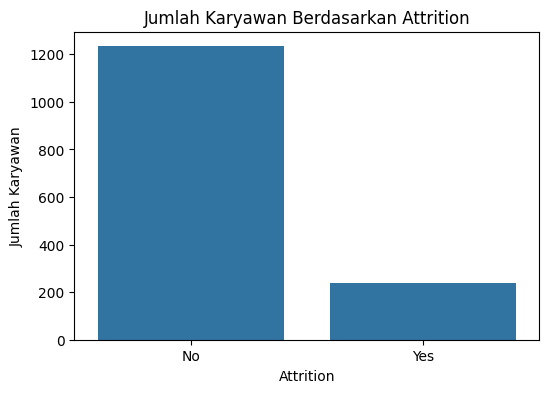

In [ ]:
attrition_count = df["Attrition"].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=attrition_count.index, y=attrition_count.values)
plt.title("Jumlah Karyawan Berdasarkan Attrition")
plt.xlabel("Attrition")
plt.ylabel("Jumlah Karyawan")
plt.show()

### **Penjelasan**

Jumlah karyawan yang tidak mengalami attrition jauh lebih besar dibandingkan yang keluar. Hal ini menunjukkan bahwa kasus attrition relatif lebih sedikit, sehingga distribusi target tidak seimbang dan perlu diperhatikan jika nantinya dilakukan pemodelan prediktif

## **Compotition / Komposisi**

Aktivitas: Melihat komposisi karyawan berdasarkan Departement

Tujuan: Mengetahui distribusi tenaga kerja di masing-masing departemen

Visualisasi: Pie chart

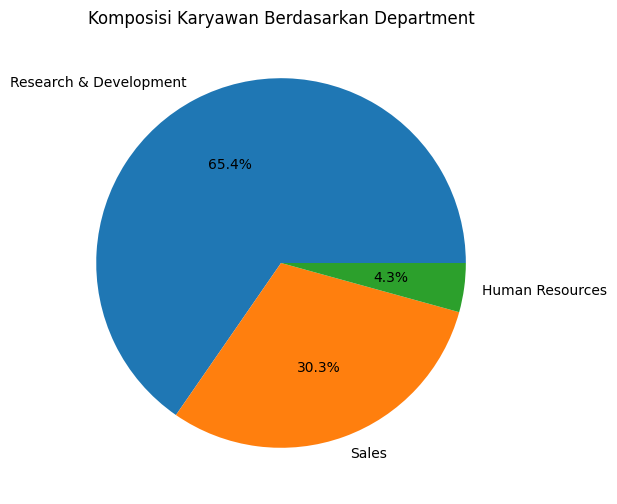

In [ ]:
dept_count = df["Department"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(dept_count.values, labels=dept_count.index, autopct="%1.1f%%")
plt.title("Komposisi Karyawan Berdasarkan Department")
plt.show()

### **Penjelasan**

Sebagian besar karyawan berasal dari departemen Research & Development. Hal ini menunjukkan fokus utama organisasi berada pada fungsi riset dan pengembangan dibandingkan departemen lainnya

## **Distribution / Distribusi**

Aktivitas: Menganalisis distribusi usia karyawan

Tujuan: Mengetahui pola sebaran usia dalam perusahaan

Visualisasi: Histogram

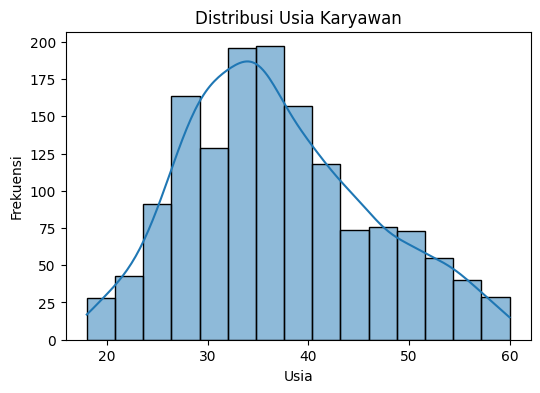

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=15, kde=True)
plt.title("Distribusi Usia Karyawan")
plt.xlabel("Usia")
plt.ylabel("Frekuensi")
plt.show()

### **Penjelasan**

Distribusi usia menunjukkan konsentrasi terbesar berada pada rentang usia 30 hingga 40 tahun. Hal ini menunjukkan mayoritas tenaga kerja berada pada usia produktif

## **Relationship / Hubungan**

Aktivitas: Menganalisis hubungan antar variabel numerik yang berpotensi memengaruhi attrition

Tujuan: Mengetahui kekuatan hubungan antar variabel seperti pendapatan, level jabatan, dan pengalaman kerja

Visualisasi: Heatmap

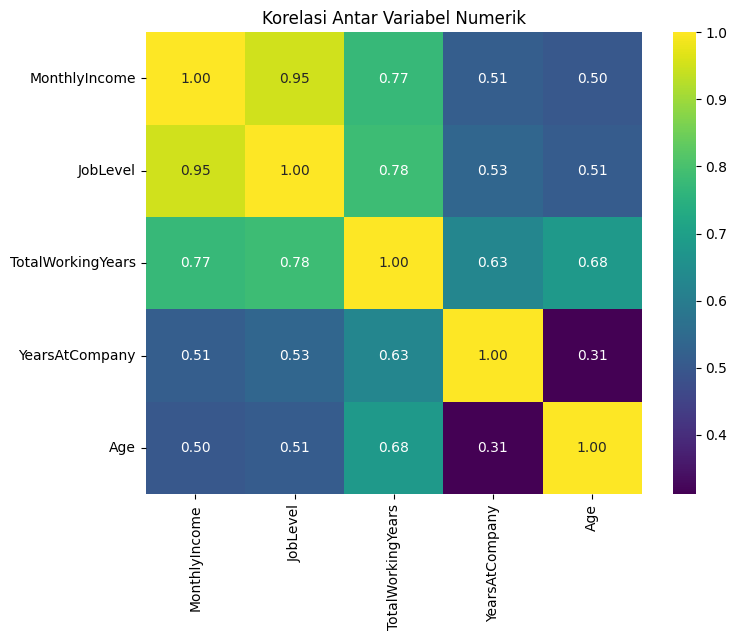

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=df[['MonthlyIncome', 'JobLevel', 'TotalWorkingYears', 'YearsAtCompany', 'Age']].corr(),
            annot=True,
            cmap='viridis',
            fmt='.2f')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

### **Penjelasan**

Heatmap menunjukkan bahwa MonthlyIncome memiliki korelasi positif yang cukup kuat dengan JobLevel dan TotalWorkingYears. Hal ini masuk akal karena semakin tinggi level jabatan dan semakin lama pengalaman kerja, maka pendapatan cenderung meningkat. Sementara itu, hubungan antara YearsAtCompany dan Age juga terlihat positif namun tidak terlalu kuat. Secara umum, tidak terdapat korelasi yang sangat ekstrem antar variabel, sehingga tidak menunjukkan adanya hubungan yang terlalu dominan di antara fitur-fitur tersebut

# *Checkpoint 3*

# **Data Preparition**

Tahap Data Preparition ini bertujuan untuk memastikan dataset bersih, konsisten, dan siap dianalisis

## **Data Type**

In [ ]:
df.shape

(1470, 35)

**Penjelasan**

Dataset ini terdiri dari 1470 baris dan 35 kolom. Jumlah baris menunjukkan total karyawan yang dianalisis, sedangkan 35 kolom itu mempresentasikan berbagai variabel yang berkaitan dengan karakteristik dan kondisi kerja karyawan

## **Incosistent Values**

In [ ]:
for col in df.select_dtypes(include=['object']):
    print(col, df[col].unique())

Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus ['Single' 'Married' 'Divorced']
Over18 ['Y']
OverTime ['Yes' 'No']


**Penjelasan**

Berdasarkan hasil pengecekan nilai unik pada setiap kolom kategorikal, tidak ditemukan perbedaan penulisan atau kategori ganda. Oleh karena itu tidak perlu dilakukan penyesuaian nilai

## **Missing Value**

In [ ]:
df.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


**Penjelasan**

Pengecekan missing values dilakukan untuk memastikan tidak terdapat data yang kosong atau tidak terisi pada setiap kolom. Keberadaan missing values dapat mempengaruhi hasil analisis dan menyebabkan bias, terutama pada proses agregasi maupun pemodelan. dan hasil yang tertera itu kolomnya memiliki nilai 0 Missing Value, Karena tidak ada Missing Value pada dataset maka tidak diperlukan proses imputasi maupun penghapusan data pada tahap ini

## **Duplicate Values**

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop_duplicates()

**Penjelasan**

Berdasarkan hasil pengecekan, tidak ditemukan adanya data duplikat pada dataset ini sehingga tidak perlu proses penghapusan duplikasi

## **Outliers**

In [ ]:
numerical_cols = [
    'MonthlyIncome',
    'TotalWorkingYears',
    'YearsAtCompany',
    'DistanceFromHome',
    'DailyRate'
]

results = []

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    percent = (len(outliers) / len(df)) * 100

    results.append([col, percent])

pd.DataFrame(results, columns=['Kolom', 'Persentase Outlier'])

,Kolom,Persentase Outlier
0,MonthlyIncome,7.755102
1,TotalWorkingYears,4.285714
2,YearsAtCompany,7.074830
3,DistanceFromHome,0.000000
4,DailyRate,0.000000


**Penjelasan**

Deteksi outlier dilakukan menggunakan metode IQR karena metode ini tidak sensitif terhadap distribusi data yang tidak normal dan mampu menentukan batas bawah serta batas atas berdasarkan karakteristik data itu sendiri.
Meskipun ditemukan beberapa nilai ekstrem berdasarkan metode IQR, nilai tersebut masih realistis dalam konteks data karyawan sehingga tidak dilakukan penghapusan maupun clipping data pada tahap ini.

# **Construct Data**

1. **Kategorisasi Masa Kerja (Tenure Category)**

Karyawan dengan masa kerja rendah biasanya lebih rentan resign dibanding yang sudah lama.

In [ ]:
df['TenureCategory'] = pd.cut(
    df['YearsAtCompany'],
    bins=[0, 3, 7, 15, 40],
    labels=['Baru', 'Menengah', 'Senior', 'Sangat Senior']
)

**Penjelasan**

Variabel Tenure Category (Kategori Masa Kerja) dibuat dengan mengelompokkan YearsAtCompany ke dalam beberapa kategori masa kerja untuk mempermudah analisis pola attrition berdasarkan tingkat pengalaman karyawan di perusahaan.

2. **Income Level**

Gaji rendah sering berhubungan dengan tingkat turnover yang lebih tinggi

In [ ]:
df['IncomeLevel'] = pd.qcut(
    df['MonthlyIncome'],
    q=3,
    labels=['Rendah', 'Sedang', 'Tinggi']
)

**Penjelasan**

Variabel IncomeLevel dibuat menggunakan metode quantile agar pembagian kategori gaji lebih proporsional berdasarkan distribusi data aktual

3. **Work Experience Ratio**

Kalau YearsAtCompany jauh lebih kecil dari TotalWorkingYears, berarti orangnya itu sering pindah kerja

In [ ]:
df['ExperienceRatio'] = df['YearsAtCompany'] / df['TotalWorkingYears']
df['ExperienceRatio'] = df['ExperienceRatio'].fillna(0)

**Penjelasan**

Variabel ExperienceRatio dibuat untuk melihat proporsi masa kerja di perusahaan saat ini dibandingkan dengan total pengalaman kerja, sehingga dapat mengidentifikasi kecenderungan loyalitas karyawan itu

# **Data Reduction**

Di data reduction ini yaitu Mengurangi kompleksitas dataset dengan menghapus kolom yang tidak relevan terhadap analisis attrition sehingga model lebih fokus dan efisien

1. **Identifikasi Kolom Tidak Relevan**

In [ ]:
df[['EmployeeCount', 'Over18', 'StandardHours']].nunique()

,0
EmployeeCount,1
Over18,1
StandardHours,1


**Penjelasan**

Berdasarkan hasil pengecekan menggunakan nunique(), ketiga kolom tersebut masing-masing hanya memiliki satu nilai unik yang berarti seluruh baris pada kolom tersebut berisi nilai yang sama. Kondisi ini menunjukkan bahwa kolom tersebut bersifat konstan dan tidak memiliki variasi data, sehingga tidak dapat digunakan untuk membedakan karakteristik karyawan maupun menjelaskan pola attrition dalam analisis.

2. **Menghapus Kolom Yang Tidak Relevan**

In [ ]:
columns_to_drop = [
    'EmployeeCount',
    'Over18',
    'StandardHours',
    'EmployeeNumber'
]

df = df.drop(columns=columns_to_drop, errors='ignore')

**Penjelasan**

Proses penghapusan kolom dilakukan menggunakan fungsi drop(), dengan tujuan menghilangkan variabel yang tidak memiliki kontribusi terhadap analisis attrition.
Penggunaan parameter inplace=True memastikan perubahan langsung diterapkan pada dataset utama, dan sedangkan errors='ignore' digunakan untuk menjaga stabilitas proses apabila terdapat perbedaan struktur dataset.